In [1]:
import rdkit

In [2]:
from naglmbis.models import load_charge_model
# load two pre-trained charge models
charge_model = load_charge_model(charge_model="nagl-v1-mbis")
# load a model trained to scf dipole and mbis charges
charge_model_2 = load_charge_model(charge_model="nagl-v1-mbis-dipole")


In [7]:
from openff.toolkit.topology import Molecule

# create ethanol
ethanol = Molecule.from_smiles("CCO")
# predict the charges (in e) and atomic volumes in (bohr ^3)
charges = charge_model.compute_properties(ethanol.to_rdkit())["mbis-charges"]
charges_2 = charge_model_2.compute_properties(ethanol.to_rdkit())["mbis-charges"]
charges_2

tensor([[-0.4306],
        [ 0.2379],
        [-0.6361],
        [ 0.1247],
        [ 0.1247],
        [ 0.1247],
        [ 0.0262],
        [ 0.0262],
        [ 0.4023]], grad_fn=<CatBackward0>)

In [13]:
from naglmbis.models.base_model import ComputePartialPolarised

water_model = load_charge_model(charge_model="nagl-gas-dipole-wb")
gas_model = load_charge_model(charge_model="nagl-water-charge-dipole-wb")

polarised_compute = ComputePartialPolarised(
    model_gas=gas_model,
    model_water=water_model,
    dialetric_constant=78.4
)
polarised_compute.compute_polarised_charges(ethanol.to_rdkit())

tensor([[-0.4885],
        [ 0.1447],
        [-0.5585],
        [ 0.1462],
        [ 0.1462],
        [ 0.1462],
        [ 0.0479],
        [ 0.0479],
        [ 0.3678]], grad_fn=<AddBackward0>)

In [15]:
water_model.compute_properties(ethanol.to_rdkit())["mbis-charges"]

tensor([[-0.4885],
        [ 0.1447],
        [-0.5585],
        [ 0.1462],
        [ 0.1462],
        [ 0.1462],
        [ 0.0479],
        [ 0.0479],
        [ 0.3678]], grad_fn=<CatBackward0>)

In [6]:
charge_model_2.compute_properties(ethanol.to_rdkit())["mbis-charges"]

tensor([[-0.4306],
        [ 0.2379],
        [-0.6361],
        [ 0.1247],
        [ 0.1247],
        [ 0.1247],
        [ 0.0262],
        [ 0.0262],
        [ 0.4023]], grad_fn=<CatBackward0>)

In [4]:
charges.flatten().tolist()


[-0.41209813952445984,
 0.23634019494056702,
 -0.6952458024024963,
 0.12052258104085922,
 0.12052258104085922,
 0.12052258104085922,
 0.02848917990922928,
 0.02848917990922928,
 0.45245763659477234]

In [5]:
charges_2.flatten().tolist()

[-0.4306110441684723,
 0.23793305456638336,
 -0.6360558271408081,
 0.12468185275793076,
 0.12468185275793076,
 0.12468185275793076,
 0.026178915053606033,
 0.026178915053606033,
 0.4023304581642151]

In [6]:
mol = '\n     RDKit          2D\n\n  3  2  0  0  0  0  0  0  0  0999 V2000\n   -0.7890   -0.1982   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0061    0.3917   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7951   -0.1936    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  2  3  1  0\nM  END\n'
rdkit_conformer = rdkit.Chem.rdmolfiles.MolFromMolBlock(mol, removeHs = False)
print(rdkit_conformer)
print(rdkit_conformer.GetAtoms())
print(rdkit_conformer.GetRingInfo())
water = Molecule.from_smiles("[H]O[H]")
waterrd = water.to_rdkit()
print(rdkit.Chem.rdmolfiles.MolToMolBlock(rdkit_conformer))
print(rdkit.Chem.rdmolfiles.MolToMolBlock(waterrd))

charges = charge_model.compute_properties(rdkit_conformer)["mbis-charges"]
print(charges)



     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
   -0.7890   -0.1982   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0061    0.3917   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7951   -0.1936    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END

tensor([[ 0.4148],
        [-0.8296],
        [ 0.4148]], grad_fn=<CatBackward0>)


In [43]:
charge_model.compute_properties(rdkit_conformer)

{'mbis-charges': tensor([[ 0.4148],
         [-0.8296],
         [ 0.4148]], grad_fn=<CatBackward0>)}

In [32]:
dgl_mol = charge_model.return_dgl_molecule(rdkit_conformer)
dgl_mol.graph.ndata

{'feat': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]]), 'formal_charge': tensor([0, 0, 0], dtype=torch.int8), 'atomic_number': tensor([1, 8, 1], dtype=torch.uint8)}

In [37]:
charge_model.forward(dgl_mol)
dgl_mol.graph.ndata['h']


tensor([[ 14.3275, 121.8238,  17.4015,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,  26.7725, 132.2623,   0.0000,   0.0000,   0.0000,
          23.6916,   0.0000,   0.0000,   0.0000,   0.0000,  28.2107,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  46.5262,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  56.8067,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   9.1129,   0.0000,   0.0000,   0.0000,   0.0000,
          60.9820,  26.2067,   0.0000,   0.0000,   0.0000,  99.1534,  47.9523,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,  17.7970,   0.0000,  24.4694, 169.3066,   0.0000,  26.4045,
           0.0000,   0.0000,   0.0000,   0.0000,   0

In [69]:
test_mol  = Molecule.from_smiles('COC1=CC(CN2CC(C2)NC(CNC3=NN(C4=C3C=C(C(F)(F)F)C=C4)C)=O)=CC=C1')
test_molrd = test_mol.to_rdkit()
dgl_mol_2 = charge_model.return_dgl_molecule(test_molrd)
charge_model.forward(dgl_mol_2)
dgl_mol_2.graph.ndata['h']

tensor([[131.3404,  82.5788,  55.9637,  ...,   8.8287,  61.6365,   0.0000],
        [169.3238,   0.0000,  72.8057,  ...,  11.5660,  36.8504,   0.0000],
        [ 48.7949,  32.9465,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [ 73.1885,  30.8973,  33.0427,  ...,   0.0000,  20.6325,   0.0000],
        [ 70.6255,  20.4643,  22.0627,  ...,   0.0000,  20.9518,   0.0000],
        [ 67.8129,  29.9475,  31.2922,  ...,   0.0000,  20.3004,   0.0000]],
       grad_fn=<ReluBackward0>)

In [121]:
import torch
from rdkit import Chem

latent_embeddings = dgl_mol_2.graph.ndata['h']


# Create a dictionary to track unique embeddings and labels
unique_embeddings = {}
atom_labels = {}

for i, atom in enumerate(test_molrd.GetAtoms()):
    atom_type = atom.GetSymbol()  # Get the atom type (C, N, O, etc.)
    embedding = latent_embeddings[i].unsqueeze(0)  # Get the embedding for the atom

    # Check if this atom type has been encountered before
    if atom_type not in unique_embeddings:
        unique_embeddings[atom_type] = [embedding]
        atom_labels[i] = f"{atom_type}1"
    else:
        # Compare with existing embeddings for this atom type
        is_unique = True
        for j, unique_embedding in enumerate(unique_embeddings[atom_type]):
            if torch.all(torch.isclose(embedding, unique_embedding, atol=50)):
                atom_labels[i] = f"{atom_type}{j+1}"
                # atom.SetProp("atomLabel", f"{atom_type}{j+1}")
                is_unique = False
                break
        
        if is_unique:
            unique_embeddings[atom_type].append(embedding)
            atom_labels[i] = f"{atom_type}{len(unique_embeddings[atom_type])}"
            # atom.SetProp("atomLabel", f"{atom_type}{len(unique_embeddings[atom_type])}")
    # Set the atom label property
    atom.SetProp("atomLabel", atom_labels[i])

In [166]:
latent_embeddings.shape

torch.Size([56, 128])

In [122]:
atom_labels

{0: 'C1',
 1: 'O1',
 2: 'C2',
 3: 'C3',
 4: 'C2',
 5: 'C1',
 6: 'N1',
 7: 'C4',
 8: 'C4',
 9: 'C4',
 10: 'N2',
 11: 'C5',
 12: 'C4',
 13: 'N2',
 14: 'C2',
 15: 'N1',
 16: 'N3',
 17: 'C2',
 18: 'C3',
 19: 'C2',
 20: 'C3',
 21: 'C6',
 22: 'F1',
 23: 'F1',
 24: 'F1',
 25: 'C2',
 26: 'C3',
 27: 'C1',
 28: 'O2',
 29: 'C3',
 30: 'C2',
 31: 'C3',
 32: 'H1',
 33: 'H1',
 34: 'H1',
 35: 'H2',
 36: 'H1',
 37: 'H1',
 38: 'H1',
 39: 'H1',
 40: 'H1',
 41: 'H1',
 42: 'H1',
 43: 'H3',
 44: 'H1',
 45: 'H1',
 46: 'H3',
 47: 'H1',
 48: 'H1',
 49: 'H2',
 50: 'H1',
 51: 'H1',
 52: 'H1',
 53: 'H2',
 54: 'H1',
 55: 'H2'}

In [123]:
unique_embeddings

{'C': [tensor([[1.3134e+02, 8.2579e+01, 5.5964e+01, 3.3431e+01, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1722e+01, 5.8006e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.3287e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3351e+01, 4.7770e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0509e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9388e+01, 8.9005e+00, 6.2021e+01,
           7.4140e+00, 4.9378e+01, 6.5881e+01, 0.0000e+00, 0.0000e+00, 4.0371e+01,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           1.6300e+00, 0.0000e+00, 0.0000e+00, 3.7183e+00, 2.8113e+01, 5.6029e+01,
           0.0000e+00, 0.0000e+00, 6.9418e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 7.3798e+01, 0.0000e+00, 0.0000e+00,
           7.6494e+01, 3.2360e+01, 0.0000e+00, 1.3415e+02, 6.3176e+01, 0.0000e+00,

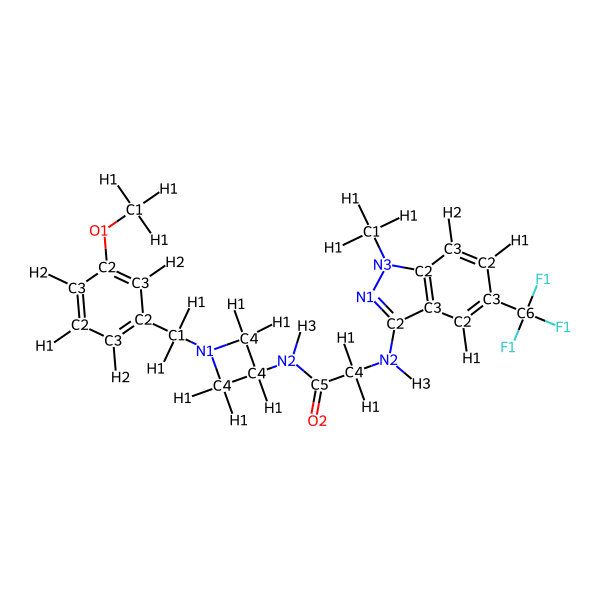

In [124]:
def molecule_with_labels(mol, labels):
    # Create a copy of the molecule
    mol = Chem.Mol(mol)
    # Create a new drawing options object
    
    
    
    drawing_options = Draw.DrawingOptions()
    # Exclude hydrogens
    drawing_options.includeAtomNumbers = False
    # Create an empty dictionary for atom indices and their custom labels
 

    # Return the molecule image with custom labels
    return Draw.MolToImage(mol, size=(600, 600), kekulize=True, options=drawing_options, legend=None, highlightAtoms=None, highlightBonds=None, highlightAtomColors=None, highlightBondColors=None, highlightAtomRadii=None)

# Generate and display the molecule with labels
image = molecule_with_labels(test_molrd, atom_labels)
image

In [159]:
from scipy.spatial.distance import cdist

# Convert the embeddings tensor to a numpy array for distance calculations
embeddings = latent_embeddings.detach().numpy()

# Calculate the pairwise Euclidean distances between embeddings
# cdist returns a matrix of distances between each pair of vectors in the two collections of inputs.
distance_matrix = cdist(embeddings, embeddings, metric='euclidean')

distance_matrix

array([[  0.        , 369.11546015, 355.02772062, ..., 320.4644023 ,
        332.28796094, 333.71411612],
       [369.11546015,   0.        , 324.764513  , ..., 271.28938037,
        270.87163577, 277.17891026],
       [355.02772062, 324.764513  ,   0.        , ..., 144.60085943,
        143.02863672, 135.2012117 ],
       ...,
       [320.4644023 , 271.28938037, 144.60085943, ...,   0.        ,
         60.19569094,  42.92251393],
       [332.28796094, 270.87163577, 143.02863672, ...,  60.19569094,
          0.        ,  57.68251367],
       [333.71411612, 277.17891026, 135.2012117 , ...,  42.92251393,
         57.68251367,   0.        ]])

In [168]:
distance_matrix.shape

(56, 56)

In [153]:
len(embeddings)

56

In [158]:
atom_labels.items()

dict_items([(0, 'C1'), (1, 'O1'), (2, 'C2'), (3, 'C3'), (4, 'C2'), (5, 'C1'), (6, 'N1'), (7, 'C4'), (8, 'C4'), (9, 'C4'), (10, 'N2'), (11, 'C5'), (12, 'C4'), (13, 'N2'), (14, 'C2'), (15, 'N1'), (16, 'N3'), (17, 'C2'), (18, 'C3'), (19, 'C2'), (20, 'C3'), (21, 'C6'), (22, 'F1'), (23, 'F1'), (24, 'F1'), (25, 'C2'), (26, 'C3'), (27, 'C1'), (28, 'O2'), (29, 'C3'), (30, 'C2'), (31, 'C3'), (32, 'H1'), (33, 'H1'), (34, 'H1'), (35, 'H2'), (36, 'H1'), (37, 'H1'), (38, 'H1'), (39, 'H1'), (40, 'H1'), (41, 'H1'), (42, 'H1'), (43, 'H3'), (44, 'H1'), (45, 'H1'), (46, 'H3'), (47, 'H1'), (48, 'H1'), (49, 'H2'), (50, 'H1'), (51, 'H1'), (52, 'H1'), (53, 'H2'), (54, 'H1'), (55, 'H2')])

In [162]:
import numpy as np
import pandas as pd

# Initialize the confusion matrix as a pandas DataFrame
# The indices and columns represent unique atom labels
unique_labels = sorted(set(atom_labels.values()))
confusion_matrix = pd.DataFrame(np.zeros((len(unique_labels), len(unique_labels))), index=unique_labels, columns=unique_labels)

# Populate the confusion matrix with aggregated distances
for i, label_i in atom_labels.items():
    for j, label_j in atom_labels.items():
        confusion_matrix.at[label_i, label_j] += distance_matrix[i, j]

# Normalize the values by the number of occurrences to get the average distance
for label in unique_labels:
    count_i = list(atom_labels.values()).count(label)
    for label_j in unique_labels:
        count_j = list(atom_labels.values()).count(label_j)
        confusion_matrix.at[label, label_j] /= (count_i * count_j)

confusion_matrix


,C1,C2,C3,C4,C5,C6,F1,H1,H2,H3,N1,N2,N3,O1,O2
C1,102.228596,319.748041,321.215551,169.804968,418.943160,449.035118,399.132013,297.264349,313.641644,337.754283,341.567696,333.533722,323.969014,341.276951,417.057794
C2,319.748041,84.225333,138.594865,219.287539,345.397044,387.646529,327.387940,162.798145,136.274831,190.026896,197.183737,292.843009,112.720449,278.915346,301.385176
C3,321.215551,138.594865,54.431247,215.942474,425.844168,470.199410,290.518974,175.681687,182.455274,256.741104,142.553043,205.658519,120.684385,236.925589,234.120300
C4,169.804968,219.287539,215.942474,62.078630,389.301805,428.215367,324.387766,193.641879,215.268582,263.619589,242.104474,259.227631,217.858557,257.692223,331.746215
C5,418.943160,345.397044,425.844168,389.301805,0.000000,210.463179,529.635903,392.994598,361.659834,311.126037,460.679778,530.305096,392.969325,503.707589,544.014502
C6,449.035118,387.646529,470.199410,428.215367,210.463179,0.000000,578.165637,442.309179,409.713121,345.911786,503.709313,569.230407,437.030734,545.165172,574.912790
F1,399.132013,327.387940,290.518974,324.387766,529.635903,578.165637,0.000000,294.251780,311.863598,399.272951,283.599031,306.231351,287.335967,231.673206,332.006179
H1,297.264349,162.798145,175.681687,193.641879,392.994598,442.309179,294.251780,70.548538,103.688479,208.672766,212.838493,292.777701,148.654241,264.988326,324.084422
H2,313.641644,136.274831,182.455274,215.268582,361.659834,409.713121,311.863598,103.688479,31.000529,159.516871,223.670399,319.968879,129.591530,276.930086,333.205761
H3,337.754283,190.026896,256.741104,263.619589,311.126037,345.911786,399.272951,208.672766,159.516871,38.061110,298.075074,390.013314,204.705940,361.477869,397.236076


In [163]:
import numpy as np
import pandas as pd

# Initialize the confusion matrix as a pandas DataFrame
# The indices and columns represent unique atom labels
unique_labels = sorted(set(atom_labels.values()))
confusion_matrix = pd.DataFrame(np.zeros((len(unique_labels), len(unique_labels))), index=unique_labels, columns=unique_labels)

# Populate the confusion matrix with aggregated distances
for i, label_i in atom_labels.items():
    for j, label_j in atom_labels.items():
        confusion_matrix.at[label_i, label_j] += distance_matrix[i, j]

# Normalize the values by the number of occurrences to get the average distance
for label in unique_labels:
    count_i = list(atom_labels.values()).count(label)
    for label_j in unique_labels:
        count_j = list(atom_labels.values()).count(label_j)
        confusion_matrix.at[label, label_j] /= (count_i * count_j)

confusion_matrix


,C1,C2,C3,C4,C5,C6,F1,H1,H2,H3,N1,N2,N3,O1,O2
C1,102.228596,319.748041,321.215551,169.804968,418.943160,449.035118,399.132013,297.264349,313.641644,337.754283,341.567696,333.533722,323.969014,341.276951,417.057794
C2,319.748041,84.225333,138.594865,219.287539,345.397044,387.646529,327.387940,162.798145,136.274831,190.026896,197.183737,292.843009,112.720449,278.915346,301.385176
C3,321.215551,138.594865,54.431247,215.942474,425.844168,470.199410,290.518974,175.681687,182.455274,256.741104,142.553043,205.658519,120.684385,236.925589,234.120300
C4,169.804968,219.287539,215.942474,62.078630,389.301805,428.215367,324.387766,193.641879,215.268582,263.619589,242.104474,259.227631,217.858557,257.692223,331.746215
C5,418.943160,345.397044,425.844168,389.301805,0.000000,210.463179,529.635903,392.994598,361.659834,311.126037,460.679778,530.305096,392.969325,503.707589,544.014502
C6,449.035118,387.646529,470.199410,428.215367,210.463179,0.000000,578.165637,442.309179,409.713121,345.911786,503.709313,569.230407,437.030734,545.165172,574.912790
F1,399.132013,327.387940,290.518974,324.387766,529.635903,578.165637,0.000000,294.251780,311.863598,399.272951,283.599031,306.231351,287.335967,231.673206,332.006179
H1,297.264349,162.798145,175.681687,193.641879,392.994598,442.309179,294.251780,70.548538,103.688479,208.672766,212.838493,292.777701,148.654241,264.988326,324.084422
H2,313.641644,136.274831,182.455274,215.268582,361.659834,409.713121,311.863598,103.688479,31.000529,159.516871,223.670399,319.968879,129.591530,276.930086,333.205761
H3,337.754283,190.026896,256.741104,263.619589,311.126037,345.911786,399.272951,208.672766,159.516871,38.061110,298.075074,390.013314,204.705940,361.477869,397.236076


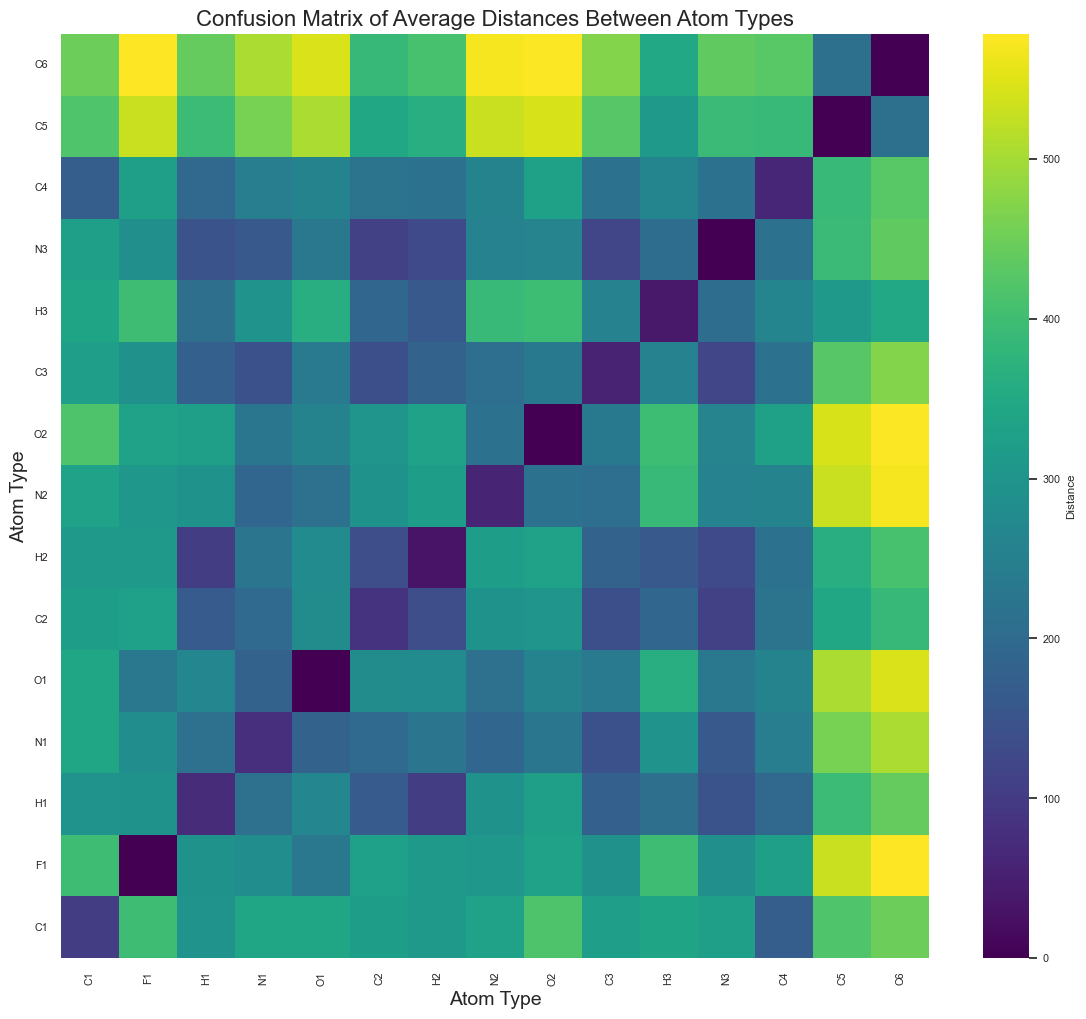

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the DataFrame to a sorted matrix
sorted_labels = sorted(confusion_matrix.columns, key=lambda x: int(x[1:]))  # Sort labels by numerical order
sorted_matrix = confusion_matrix.loc[sorted_labels, sorted_labels]

# Plot configuration
plt.figure(figsize=(14, 12))  # Increase figure size
sns.set(font_scale=0.7)  # Adjust to scale down text size if needed

# Create a heatmap
ax = sns.heatmap(sorted_matrix.reindex(index=sorted_matrix.index[::-1]), annot=False, cmap='viridis', cbar_kws={'label': 'Distance'})
plt.title('Confusion Matrix of Average Distances Between Atom Types', fontsize=16)
plt.xlabel('Atom Type', fontsize=14)
plt.ylabel('Atom Type', fontsize=14)

# Rotate tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [139]:
sorted_matrix

,C1,F1,H1,N1,O1,C2,H2,N2,O2,C3,H3,N3,C4,C5,C6
C1,102.228596,399.132013,297.264349,341.567696,341.276951,319.748041,313.641644,333.533722,417.057794,321.215551,337.754283,323.969014,169.804968,418.943160,449.035118
F1,399.132013,0.000000,294.251780,283.599031,231.673206,327.387940,311.863598,306.231351,332.006179,290.518974,399.272951,287.335967,324.387766,529.635903,578.165637
H1,297.264349,294.251780,70.548538,212.838493,264.988326,162.798145,103.688479,292.777701,324.084422,175.681687,208.672766,148.654241,193.641879,392.994598,442.309179
N1,341.567696,283.599031,212.838493,79.041629,181.869046,197.183737,223.670399,190.414689,227.790281,142.553043,298.075074,158.890030,242.104474,460.679778,503.709313
O1,341.276951,231.673206,264.988326,181.869046,0.000000,278.915346,276.930086,212.906348,257.474294,236.925589,361.477869,231.018349,257.692223,503.707589,545.165172
C2,319.748041,327.387940,162.798145,197.183737,278.915346,84.225333,136.274831,292.843009,301.385176,138.594865,190.026896,112.720449,219.287539,345.397044,387.646529
H2,313.641644,311.863598,103.688479,223.670399,276.930086,136.274831,31.000529,319.968879,333.205761,182.455274,159.516871,129.591530,215.268582,361.659834,409.713121
N2,333.533722,306.231351,292.777701,190.414689,212.906348,292.843009,319.968879,57.056661,217.376487,205.658519,390.013314,254.965646,259.227631,530.305096,569.230407
O2,417.057794,332.006179,324.084422,227.790281,257.474294,301.385176,333.205761,217.376487,0.000000,234.120300,397.236076,260.971527,331.746215,544.014502,574.912790
C3,321.215551,290.518974,175.681687,142.553043,236.925589,138.594865,182.455274,205.658519,234.120300,54.431247,256.741104,120.684385,215.942474,425.844168,470.199410


In [129]:
foo = {
    'a':    1,
    'b':    2,
    'c':    3,
    }

for items in foo.items():
    print(items[1])
    foo[items[0]] = 'b'

1
2
3


In [130]:
[foo[key] for key in ['a','b']]

['b', 'b']

In [131]:
import json
import os
file_name = "test.json"
with open(file_name,"w") as outfile:
    json.dump(foo, outfile, indent=2)
    print(os.path.abspath(file_name))


/Users/localadmin/Documents/projects/nagl-mbis/test.json


In [132]:
from rdkit import Chem

mol_file = '/Users/localadmin/Documents/projects/molevaluate/tests/data/saq.sdf'
molevaluate_example = Chem.SDMolSupplier(mol_file)
print(molevaluate_example[0])

charges = charge_model.compute_properties(molevaluate_example[0])['mbis-charges']
charges = charges.flatten().tolist()
print(charges)
# molevaluate_openff = Molecule.from_rdkit(molevaluate_example[0])
# molevaluate_openff.assign_partial_charges('am1bcc')
# molevaluate_openff.partial_charges

OSError: File error: Bad input file /Users/localadmin/Documents/projects/molevaluate/tests/data/saq.sdf